# Regularized Linear Regression and Bias v.s. Variance

*In this notebook, we will implement regularized linear regression and use it to study models with different bias-variance properties.*

**Import third-party libraries and modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as io

from featureNormalize import featureNormalize
from learningCurve import learningCurve
from linearRegCostFunction import linearRegCostFunction
from plotFit import plotFit
from polyFeatures import polyFeatures
from bsxfun import bsxfun
from trainLinearReg import trainLinearReg
from validationCurve import validationCurve
from sub_op import sub_op
from div_op import div_op

## Regularized Linear Regression
### 1.1 Visualizing the dataset
We will begin visualizing the dataset containing historical records on the change in the water level, $x$, and the amount of waterd flowing out of the dam, $y.$

This dataset is divided into three parts:
* A **training** set that our model will learn on: X, y
* A **cross validation** for determining the regularization parameter: Xval, yval
* A **test** set for evaluating performance. These are *"unseen"* examples which our model did not see during training: Xtest, ytest

We will implement regression and use that to fit a straight line to data and plot learing curves.

Loading and Visualizing Data ...



Text(0, 0.5, 'Water flowing out of the dam (y)')

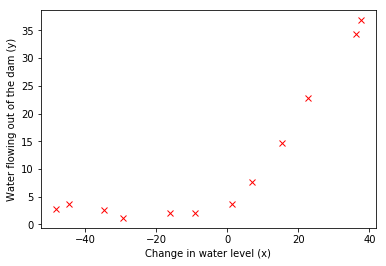

In [2]:
## ============== Part 1: Loading and Visualizing Data ===================
# Load Training Data
print('Loading and Visualizing Data ...\n')

# Load from ex5data1:
data = io.loadmat('ex5data1.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']
m = X.shape[0]
# Plot training data
plt.plot(X, y, 'rx')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

### 1.2 Regularized linear regression cost function
Regularized linear regression cost function:

$$
J\big(\theta\big) = \frac{1}{2m}\Big(\sum_{i=1}^{m}\big(h_{\theta}(x^{(i)}) - y^{(i)}\big)^{2}\Big)
+ \frac{\lambda}{2m}\Big(\sum_{j=1}^{n}\theta_{j}^{2}\Big)
$$

where $\lambda$ is regularization parameter which controls degree of regularization (thus, help preventing overfitting).

When the notebook runs, we should  expect to see an output of $303.993$

In [3]:
## =============== Part 2: Regularized Linear Regression Cost =================
theta = np.ones((2, 1))
X_b = np.hstack((np.ones((m, 1)), X))

J = linearRegCostFunction(theta, X_b, y, 1)[0]
print('Cost function at theta [1, 1]: {}'.format(J))

Cost function at theta [1, 1]: 303.9931922202643


### 1.3 Regularized linear regression gradient
$$
\frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m}\sum_{i=1}^{m}\big(h_{\theta}(x^{(i)}) - y^{(i)}\big)x_{j}^{(i)}; \big(j = 0\big) \\
\frac{\partial J(\theta)}{\partial\theta_{j}} = \Big(\frac{1}{m}\sum_{i=1}^{m}\big(h_{\theta}(x^{(i)}) - y^{(i)}\big)x_{j}^{(i)}\Big) + \frac{\lambda}{m}\theta_{j}; \big(j \ge 1\big)
$$

We should expect to see a gradient of $[-15.30, 598.250]$

In [4]:
grad = linearRegCostFunction(theta, X_b, y, 1)[1]

print('Gradient at theta = [1; 1]: [%f; %f]\n' % (grad[0], grad[1]))
print('(This value should be about [-15.303016; 598.250744])\n')

Gradient at theta = [1; 1]: [-15.303016; 598.250744]

(This value should be about [-15.303016; 598.250744])



### 1.4 Fitting linear regression
We set regularization parameter $\lambda$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension.

Finally, the notebook should also plot the best fit line, resulting in an image similar Figure 1. The best fit line tells us is not a good to fit the data because the data has non-linear pattern. While visualizing the fit as shown is one possible way to debug our learning algorithm, it is not always easy to visualize the data and model.

Text(0.5, 1.0, 'Figure 1: Linear regression fit (Underfitting)')

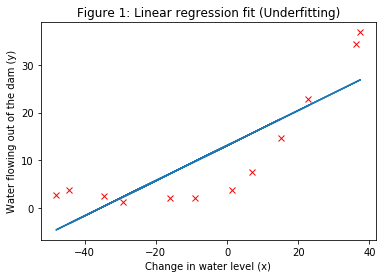

In [5]:
## ======== Part 4: Train Linear Regression ============
lambda_ = 0

initial_theta = np.zeros((X_b.shape[1]))
theta = trainLinearReg(X_b, y, lambda_)

# Plot fit over the data
plt.plot(X, X_b.dot(theta), '-')
plt.plot(X, y, 'rx')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Figure 1: Linear regression fit (Underfitting)')

## 2. Bias-variance
An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

In this part, we will plt training and test errors on a learning curve to diagnose bias-variace problems.

### 2.1 Learning curves
We will now implement code to gernarate the learning curves that will be useful in debugging learning algorithms. Our **learningCurve** function will return a vector of errors for the training set and cross validation set.

We use the **trainLinearReg** function to find the $\theta$ parameters.

Recall that the training error for a dataset is defined as

$$
J_{train}\big(\theta\big) = \frac{1}{2m}\Big[\sum_{i=1}^{m}\big(h_{\theta}(x^{(i)}) - y^{(i)}\big)^{2}\Big]
$$

In particular, note that the training error does not include the regularization term. One way to compute the training error and cross validation error. For the cross validation error, we should compute it over the *entire* cross validation set.

Notebook will print the learning curves and produce a plot similar to Figure 2.

# Training Examples	Train Error				Cross Validation Error

  	1		3.944305e-31			205.121096

  	2		6.409495e-31			110.300366

  	3		3.286595			45.010232

  	4		2.842678			48.368911

  	5		13.154049			35.865141

  	6		19.443963			33.829957

  	7		20.098522			31.970987

  	8		18.172859			30.862446

  	9		22.609405			31.135998

  	10		23.261462			28.936207

  	11		24.31725			29.551432

  	12		22.373906			29.433818



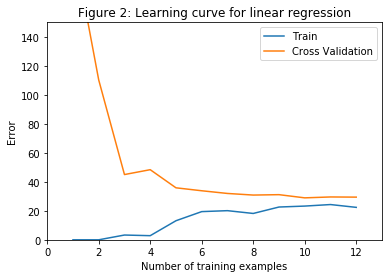

In [6]:
## =============== Part 5: Learning Curve for Linear Regression
lambda_ = 0
Xval_b = np.hstack((np.ones((Xval.shape[0], 1)), Xval))

error_train, error_val = learningCurve(X_b, y, Xval_b, yval, lambda_)

plt.plot(np.arange(1,m+1), error_train, np.arange(1, m+1), error_val)
plt.title('Figure 2: Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\t\t\t\tCross Validation Error\n')
# np.set_printoptions(precision=6, formatter={'float': '{:0.6}'.format})
with np.printoptions(precision=6):
    for i in range(m):
        print('  \t{}\t\t{}\t\t\t{}\n'.format(i+1,
                                              np.array2string(error_train[i]),
                                              np.array2string(error_val[i])))

We can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a **high bias** problem in the model - the linear regression model is too simple and is unable to fit our dataset well.

## 3. Polynomial regression
We will address the problem of underfitting (high bias) by adding more features.

For use polynomial regression, our hypothesis has the form:

$$
h_{\theta}(x) = \theta_{0} + \theta_{1}*(waterLevel) + \theta_{2}*(waterLevel)^{2} + \ldots + \theta_{p}(waterLevel)^{p} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \ldots + \theta_{p}x{p}
$$

Notice that by defining $x_{1} = (waterLevel), x_{2} = (waterLevel)^{2}, \ldots, x_{p} = (waterLevel)^{p}$, we obtain a linear regression model where the features are the various powers of the original value $(waterLevel)$

In [7]:
## =========== Part 6: Feature mapping for Polynomial Regression ============
degree = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, degree)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.hstack((np.ones((m, 1)), X_poly))
# Map X_poly_test
X_poly_test = polyFeatures(Xtest, degree)
X_poly_test = bsxfun(sub_op, X_poly_test, mu)
X_poly_test = bsxfun(div_op, X_poly_test, sigma)
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0], 1)), X_poly_test))

# Map X_poly_val
X_poly_val = polyFeatures(Xval, degree)
X_poly_val = bsxfun(sub_op, X_poly_val, mu)
X_poly_val = bsxfun(div_op, X_poly_val, sigma)
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0], 1)), X_poly_val))

print('Normalized Training Example 1: \n')

with np.printoptions(precision=6, suppress=True):
    for elem in range(X_poly[0].size):
        print('{}\n'.format(np.array2string(X_poly[0, elem])))

Normalized Training Example 1: 

1.

-0.378244

-0.788662

0.190329

-0.737591

0.320252

-0.617152

0.359835

-0.531091



### 3.1 Learning Polynomial Regression
Now, we will proceed to train polynomial regression using our linear regression cost function.

Keep in mind that even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem. The polynomial terms have simply turned into features that we can use for linear regression. We are using the same cost function and gradient that we wrote for the earlier part of this notebook.

We will be using a polynomial of degree 8. It turns out that if we run the training directly on the projected data, will not work well as the features would be badly scaled. Therefore, we will need to use feature normalization.

After learning the params $\theta$, we should see two plots (**Figure: 3, 4**)

Polynomial Regression (lambda = 1)


# Training examples	Training Error			Cross Validation Error

	1		9.860761315262648e-32		161.44216831742497

	2		3.792572061366455e-28		160.79229150111104

	3		4.6174429534731635e-11		67.08492232193547

	4		9.945381304876258e-22		67.72684941540668

	5		1.6025176590832153e-17		6.6169871434565914

	6		9.285235024946016e-14		10.643061962173554

	7		2.3121282552590001e-07		28.06653421984749

	8		0.00035145012061913426		21.423049979995046

	9		0.00028037444114658054		31.42237876681919

	10		0.09789042190553383		7.013362187305546

	11		0.07625382491566474		7.489655415583908

	12		0.06231713787883841		8.180624421791784



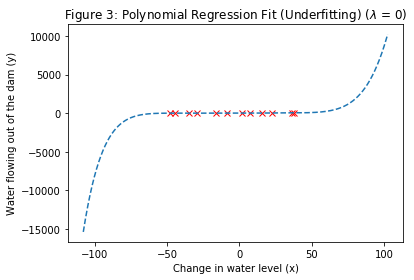

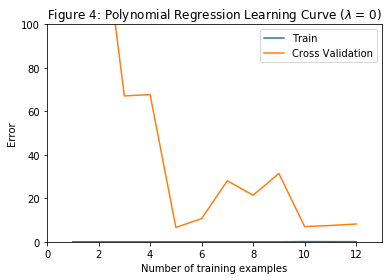

In [8]:
## ============ Part 7: Learning Curve for Polynomial Regression ==============
lambda_ = 0
theta = trainLinearReg(X_poly, y, lambda_)

# plot training data and fit
plt.plot(X, y, 'rx')
plotFit(np.min(X), np.max(X), mu, sigma, theta, degree)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Figure 3: Polynomial Regression Fit (Underfitting) ($\lambda$ = {})'.format(lambda_))

error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)

plt.figure()
plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val)
plt.title('Figure 4: Polynomial Regression Learning Curve ($\lambda$ = {})'.format(lambda_))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = 1)\n\n')
print('# Training examples\tTraining Error\t\t\tCross Validation Error\n')
for i in range(m):
    print('\t{}\t\t{}\t\t{}\n'.format(i+1, error_train[i], error_val[i]))

From **Figure 3**, we should see that polynomial fit is able to follow the data points very well- thus, obtaining a low training error. However, the polynomial fit is very complex and even drops off at the extremes. This is an inidicator that the polynomial regerssion model is overfitting the training data and will not generalize  well.

To better understand the problems with unregularized ($\lambda = 0$) model, we can see that learning curve **(Figure 4)** shows the same effect where the low training error is low, but the cross validation error is high. There is a gap between the training and cross validation erros, indicating a high variance problem.

One way to combat the overfitting problem is to add regularization to the model.

### 3.2 Adjusting the regularization parameter
In this part, we will get to observe how the regularization parameter affects the bias-variance of regularized polynomial regression. We should now modify the *lambda* parameter and try $\lambda=1$ and $\lambda=100$. For each of these values, the notebook should generate a polynomial fit to the data and also a learning curve.

For $\lambda=1$, we should see a polynomial fit that follows the data trend well **(Figure 5)** and a learning curve **(Figure 6)** showing that both the cross validation and training error converge to relatively low value. This shows the $\lambda=1$ regularized polynomial regression model does not have the high-bias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.

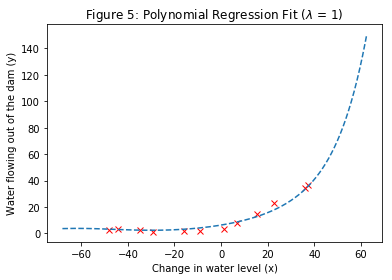

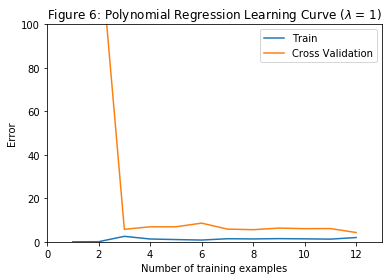

In [9]:
lambda_ = 1
theta_ = trainLinearReg(X_poly, y, lambda_)

# plot training data and fit
plt.plot(X, y, 'rx')
plotFit(np.min(X) +40, np.max(X) -40, mu, sigma, theta_, degree)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Figure 5: Polynomial Regression Fit ($\lambda$ = {})'.format(lambda_))

error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)

plt.figure()
plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val)
plt.title('Figure 6: Polynomial Regression Learning Curve ($\lambda$ = {})'.format(lambda_))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

For $\lambda=100$, we should see a polynomial fit **(Figure 7)** that does not follow the data well. In this case, there is too much regularization and the model is unable to fit the training data.

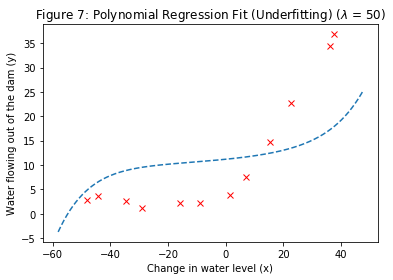

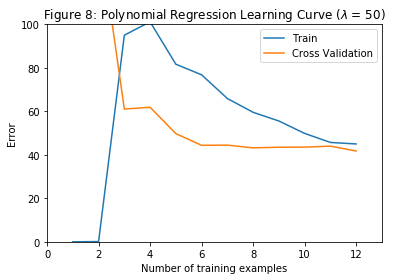

In [10]:
lambda_ = 50
theta = trainLinearReg(X_poly, y, lambda_)

# plot training data and fit
plt.plot(X, y, 'rx')
plotFit(np.min(X) + 50, np.max(X) - 55, mu, sigma, theta, degree)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Figure 7: Polynomial Regression Fit (Underfitting) ($\lambda$ = {})'.format(lambda_))

error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)

plt.figure()
plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val)
plt.title('Figure 8: Polynomial Regression Learning Curve ($\lambda$ = {})'.format(lambda_))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

### 3.3 Selecting $\lambda$ using a cross validation set
From the previous part, we observed that the value of $\lambda$ can significantly affect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization ($\lambda=0$) fits the training set well, but does not generalize. Conversely, a model with too much regularization ($\lambda=100$) does not fit the training set and testing set well. A good choid of $\lambda$ can provide a good fit to the data.

In this part, we will implement an automated method to select the $\lambda$ parameter. Concretely, we will use a cross validatoin set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

We shoud try $\lambda$ in the following range: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}

Text(0.5, 1.0, 'Figure 8: Selecting $\\lambda$ using a cross validation set')

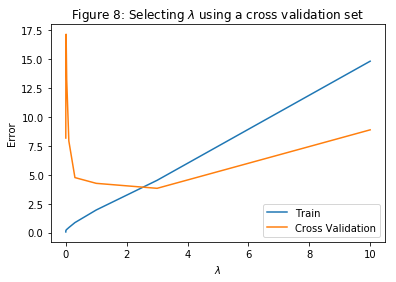

In [11]:
## ================== Part 8: Validation for Selecting lambda ====================
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)
plt.plot(lambda_vec.ravel(), error_train.ravel(), lambda_vec.ravel(), error_val.ravel())
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('$\lambda$')
plt.ylabel('Error')
plt.title('Figure 8: Selecting $\lambda$ using a cross validation set')

In Figure 8, we can see that the best value of $\lambda$ is around 3. Due to randomness in the training set and validation set splits of the dataset, the cross validation error can sometimes be lower than the training error.

In [12]:
print('\nlambda\t\tTrain Error\t\tValidation Error\n')
for i in range(lambda_vec.size):
    print('{}\t\t{}\t\t{}'.format(lambda_vec[i], error_train[i], error_val[i]))


lambda		Train Error		Validation Error

[0.]		[0.06231714]		[8.18062442]
[0.001]		[0.12582249]		[10.95495438]
[0.003]		[0.1667661]		[15.98765781]
[0.01]		[0.21802346]		[17.15719983]
[0.03]		[0.27513404]		[13.21667469]
[0.1]		[0.43864807]		[7.92719107]
[0.3]		[0.86816881]		[4.76080186]
[1.]		[1.95869484]		[4.26335863]
[3.]		[4.52510481]		[3.83217638]
[10.]		[14.82580826]		[8.88972473]


### 3.4 Computing test set error
To get a better indication of the model's performance in the real world, it is important to evaluate the "final" model on test set that was not used in any part of training.

We should complete the test error using the best value of $\lambda$ we found. In our cross validation, we obtained a test error of 2.78 for $\lambda = 3$

In [13]:
## ========================= Bonus: Computing test set error ====================
error_test = linearRegCostFunction(theta_, X_poly_test, ytest, 0)[0]
print('\n=======================================\n')
print('Test set error is: {}'.format(error_test))



Test set error is: 2.7800090472690058
